In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
import warnings



In [2]:
warnings.filterwarnings("ignore")

In [34]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
df=pd.read_csv(r"C:\Users\sankara subramanian\Downloads\Copper_Set.xlsx - Krish 1.csv")

In [4]:
df.columns=df.columns.str.capitalize()

In [5]:
df['Item_date']=pd.to_datetime(df['Item_date'],format='%Y%m%d', errors='coerce').dt.date
df['Delivery date']=pd.to_datetime(df['Delivery date'],format='%Y%m%d',errors='coerce').dt.date
df['Quantity tons']=pd.to_numeric(df['Quantity tons'],errors='coerce')


In [6]:
material_null=df[df['Material_ref'].isnull()]

In [7]:
material_null

,Id,Item_date,Quantity tons,Customer,Country,Status,Item type,Application,Thickness,Width,Material_ref,Product_ref,Delivery date,Selling_price
12,EE7EE006-15B3-47A5-A48D-70D54C6B734C,2021-04-01,27.512545,30165529.0,78.0,Won,W,10.0,0.75,1250.0,NaN,164141591,2021-07-01,1098.0
14,99659229-166B-4966-AA1F-9796DA6055DB,2021-04-01,10.411350,30271717.0,28.0,To be approved,W,10.0,0.60,1250.0,NaN,611993,2021-07-01,1258.0
18,9CEF626C-6124-4C5C-9D54-0E5B8A8F2782,2021-04-01,16.253987,30271717.0,28.0,To be approved,W,10.0,0.80,1250.0,NaN,611993,2021-07-01,1193.0
22,93B04F7B-0A4C-4D45-AB3A-67DB7888869A,2021-04-01,14.203574,30271717.0,28.0,To be approved,W,10.0,0.60,1000.0,NaN,611993,2021-07-01,1265.0
26,NaN,2021-04-01,15.927990,30271717.0,28.0,To be approved,W,10.0,0.80,1000.0,NaN,611993,2021-07-01,1208.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181652,F5EC467C-300D-4E85-BEF7-51999E0B7CA7,2020-07-02,1.672379,30155929.0,25.0,Won,W,41.0,0.58,1220.0,NaN,611993,2020-07-01,776.0
181653,497F5391-F450-4B49-870D-9B62A0274DD6,2020-07-02,50.646907,30155929.0,25.0,Won,W,41.0,0.69,1220.0,NaN,611993,2020-07-01,763.0
181654,04701946-E052-44C9-BCB5-C6AFC2EBFF7E,2020-07-02,3.769829,30155929.0,25.0,Won,W,41.0,0.69,1220.0,NaN,611993,2020-07-01,773.0
181655,D9E161D4-ACE6-47B5-ADB0-71FB3E95BF9A,2020-07-02,220.875272,30155929.0,25.0,Won,W,41.0,0.69,1220.0,NaN,611993,2020-07-01,766.0


In [8]:
df['Material_ref']=df['Material_ref'].fillna('Unknown')

In [9]:
df=df.dropna()

In [10]:
df.isnull().sum()

Id               0
Item_date        0
Quantity tons    0
Customer         0
Country          0
Status           0
Item type        0
Application      0
Thickness        0
Width            0
Material_ref     0
Product_ref      0
Delivery date    0
Selling_price    0
dtype: int64

In [11]:
df[['Item_date','Delivery date']]

,Item_date,Delivery date
0,2021-04-01,2021-07-01
1,2021-04-01,2021-04-01
2,2021-04-01,2021-01-01
3,2021-04-01,2021-01-01
4,2021-04-01,2021-03-01
...,...,...
181668,2020-07-02,2020-07-01
181669,2020-07-02,2020-07-01
181670,2020-07-02,2020-07-01
181671,2020-07-02,2020-07-01


In [12]:
df1=df.copy()

In [13]:
df1.isnull().sum()

Id               0
Item_date        0
Quantity tons    0
Customer         0
Country          0
Status           0
Item type        0
Application      0
Thickness        0
Width            0
Material_ref     0
Product_ref      0
Delivery date    0
Selling_price    0
dtype: int64

In [14]:
df1['Quantity tons'].max()

1000000000.0

In [15]:
df1['Quantity tons'].min()

-2000.0

C:\Users\sankara subramanian\AppData\Local\Temp\ipykernel_3800\2124639772.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Quantity tons'])


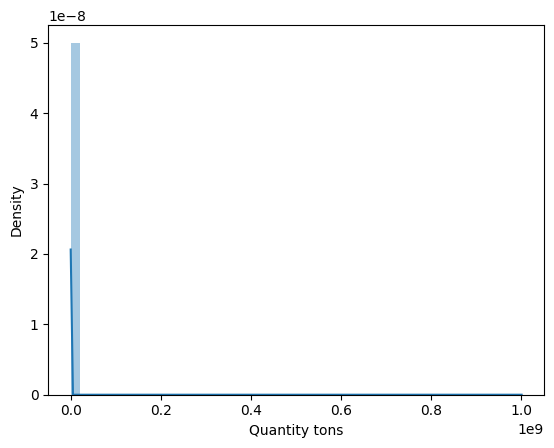

C:\Users\sankara subramanian\AppData\Local\Temp\ipykernel_3800\2124639772.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Country'])


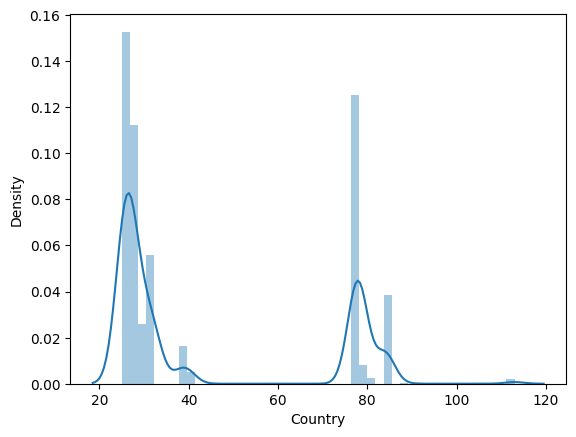

C:\Users\sankara subramanian\AppData\Local\Temp\ipykernel_3800\2124639772.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Application'])


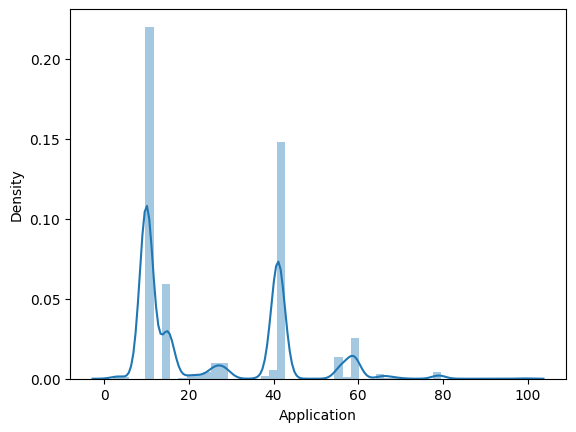

C:\Users\sankara subramanian\AppData\Local\Temp\ipykernel_3800\2124639772.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Thickness'])


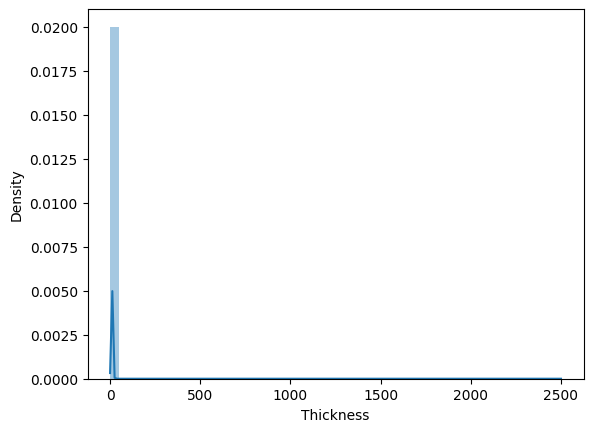

C:\Users\sankara subramanian\AppData\Local\Temp\ipykernel_3800\2124639772.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Width'])


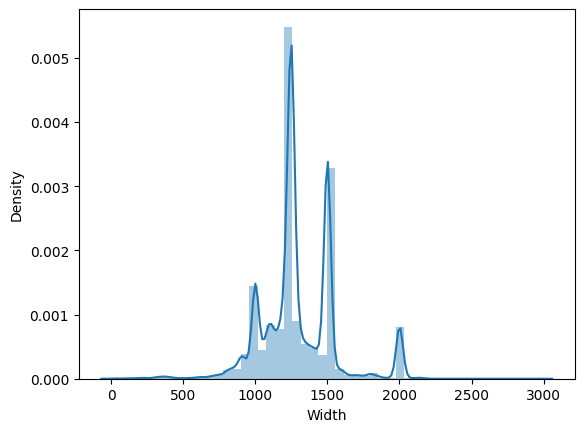

C:\Users\sankara subramanian\AppData\Local\Temp\ipykernel_3800\2124639772.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Selling_price'])


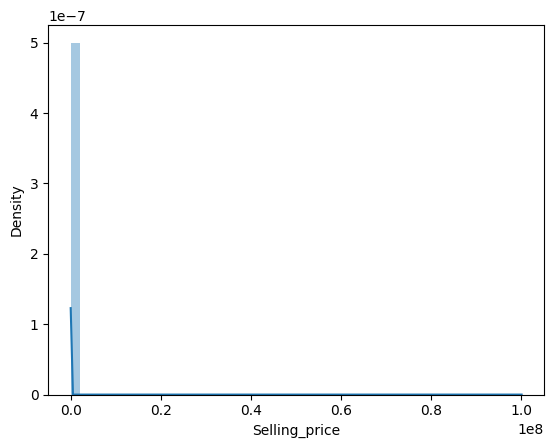

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df1['Quantity tons'])
plt.show()
sns.distplot(df1['Country'])
plt.show()
sns.distplot(df1['Application'])
plt.show()
sns.distplot(df1['Thickness'])
plt.show()
sns.distplot(df1['Width'])
plt.show()
sns.distplot(df1['Selling_price'])
plt.show()

In [16]:
mask1=df1['Selling_price']<=0
print(mask1.sum())
df1.loc[mask1,'Selling_price'] =np.nan
mask2=df1['Thickness']<= 0
print(mask2.sum())

mask3=df1['Quantity tons']<= 0
print(mask3.sum())
df1.loc[mask3,'Quantity tons']=np.nan

7
0
4


In [17]:
df1.isna().sum()

Id               0
Item_date        0
Quantity tons    4
Customer         0
Country          0
Status           0
Item type        0
Application      0
Thickness        0
Width            0
Material_ref     0
Product_ref      0
Delivery date    0
Selling_price    7
dtype: int64

In [18]:
df1.dropna(inplace=True)


In [19]:
df1.isnull().sum()

Id               0
Item_date        0
Quantity tons    0
Customer         0
Country          0
Status           0
Item type        0
Application      0
Thickness        0
Width            0
Material_ref     0
Product_ref      0
Delivery date    0
Selling_price    0
dtype: int64

In [43]:
import numpy as np

In [20]:
df1.columns

Index(['Id', 'Item_date', 'Quantity tons', 'Customer', 'Country', 'Status',
       'Item type', 'Application', 'Thickness', 'Width', 'Material_ref',
       'Product_ref', 'Delivery date', 'Selling_price'],
      dtype='object')

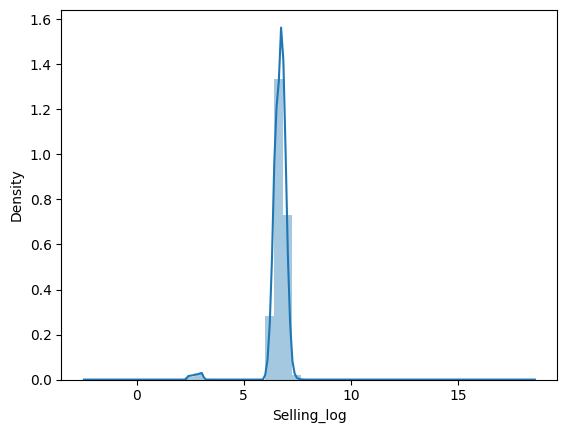

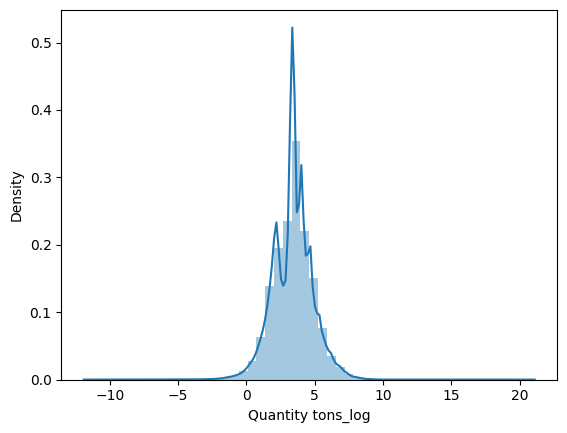

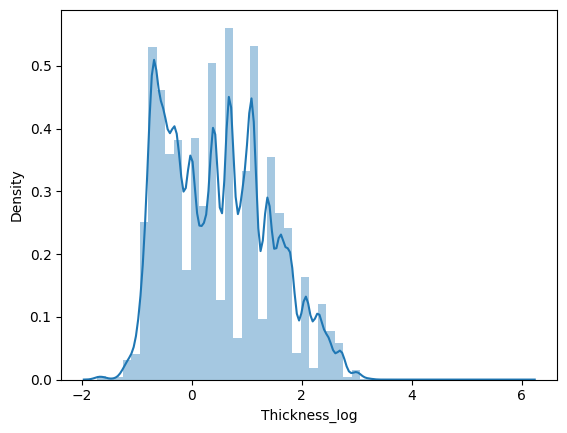

In [21]:
import numpy as np
df1['Selling_log'] = np.log(df1['Selling_price'])
sns.distplot(df1['Selling_log'])
plt.show()

df1['Quantity tons_log'] = np.log(df1['Quantity tons'])
sns.distplot(df1['Quantity tons_log'])
plt.show()

df1['Thickness_log'] = np.log(df1['Thickness'])
sns.distplot(df1['Thickness_log'])
plt.show()

In [21]:
df1.columns

Index(['Id', 'Item_date', 'Quantity tons', 'Customer', 'Country', 'Status',
       'Item type', 'Application', 'Thickness', 'Width', 'Material_ref',
       'Product_ref', 'Delivery date', 'Selling_price', 'Selling_log',
       'Quantity tons_log', 'Thickness_log'],
      dtype='object')

In [22]:
correlation_matrix=df1[['Quantity tons_log','Application','Thickness_log','Width','Selling_log','Country','Customer','Product_ref']].corr()

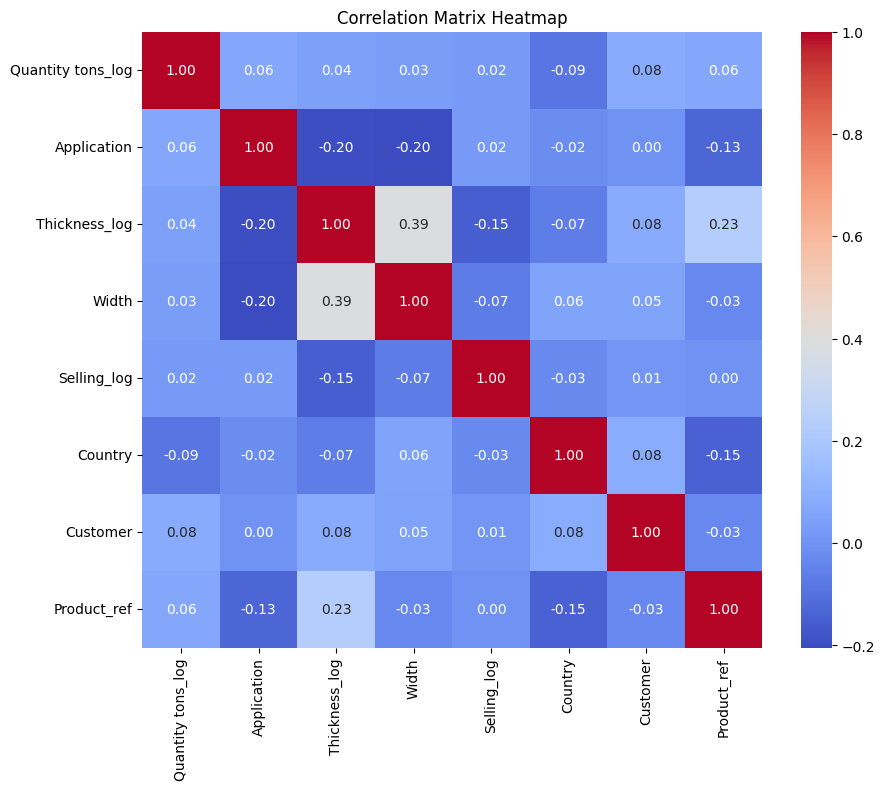

In [23]:
# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [24]:
df1['Quantity tons_log'].min()

-11.512925464970229

In [25]:
df1['Status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [26]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
X=df1[['Quantity tons_log','Status','Item type','Customer','Country','Application','Product_ref','Width','Thickness_log']]
y=df1['Selling_log']
ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['Item type']])
X_ohe=ohe.fit_transform(X[['Item type']]).toarray()
ohe2=OneHotEncoder(handle_unknown='ignore')
ohe2.fit(X[['Status']])
X_be=ohe2.fit_transform(X[['Status']]).toarray()
print(X_ohe)
print(X_be)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [27]:
X = np.concatenate((X[['Quantity tons_log', 'Application', 'Thickness_log', 'Width','Country','Customer','Product_ref']].values, X_ohe, X_be), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.3, random_state=10)

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

dtr = DecisionTreeRegressor()
# hyperparameters
param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}
# gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
# evalution metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Best hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
Mean squared error: 0.03100151647370265
R-squared: 0.8991002079053632


In [32]:
new_sample = np.array([[np.log(60), 40, np.log(568), 0, 28,30202937,1670798777,'PL','Lost']])
new_sample_ohe = ohe.transform(new_sample[:, [7]]).toarray()
new_sample_be = ohe2.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,]], new_sample_ohe, new_sample_be), axis=1)
new_sample1 = scaler.transform(new_sample)
new_pred = best_model.predict(new_sample1)
print('Predicted selling price:', np.exp(new_pred))

Predicted selling price: [570.02631765]


In [34]:
# Saving the model
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('t.pkl', 'wb') as f:
    pickle.dump(ohe, f)
with open('s.pkl', 'wb') as f:
    pickle.dump(ohe2, f)

In [35]:
df_c = df1[df1['Status'].isin(['Won', 'Lost'])]
len(df_c)

150427

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelBinarizer

Y = df_c['Status']
X= df_c[['Quantity tons_log','Selling_log','Item type','Application','Thickness_log','Width','Country','Customer','Product_ref']]

# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['Item type']])
X_ohe = ohe.fit_transform(X[['Item type']]).toarray()
be = LabelBinarizer()
be.fit(Y) 
y = be.fit_transform(Y)
# independent features after encoding
X = np.concatenate((X[['Quantity tons_log','Selling_log','Application','Thickness_log','Width','Country','Customer','Product_ref']].values, X_ohe), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# decision tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

Accuracy: 0.9117862128564781
Confusion Matrix:
[[ 5678  1324]
 [ 1330 21754]]


In [37]:
# Evalution Metrics
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 5678  1324]
 [ 1330 21754]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      7002
           1       0.94      0.94      0.94     23084

    accuracy                           0.91     30086
   macro avg       0.88      0.88      0.88     30086
weighted avg       0.91      0.91      0.91     30086



In [38]:
# Predict the status for a new sample
# 'quantity tons_log', 'selling_price_log','application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe
new_sample = np.array([[np.log(700), np.log(956), 10, np.log(2),1500,28.0,30202938,1670798778,'W']])
new_sample_ohe = ohe.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,7]], new_sample_ohe), axis=1)
new_sample = scaler.transform(new_sample)
new_pred = dtc.predict(new_sample)
if new_pred==1:
    print('The status is: Won')
else:
    print('The status is: Lost')

The status is: Won


In [39]:

# Saving the model
import pickle
with open('cmodel.pkl', 'wb') as file:
    pickle.dump(dtc, file)
with open('cscaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('ct.pkl', 'wb') as f:
    pickle.dump(ohe, f) 

In [43]:
df1

,Id,Item_date,Quantity tons,Customer,Country,Status,Item type,Application,Thickness,Width,Material_ref,Product_ref,Delivery date,Selling_price,Selling_log,Quantity tons_log,Thickness_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,6.749931,3.991779,0.693147
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,6.953684,6.643822,-0.223144
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,6.468211,5.956169,-0.967584
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,6.643790,5.310301,0.832909
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,6.357842,6.666354,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,0B812591-B501-4F34-859A-B06381FAEB44,2020-07-02,106.783299,30200854.0,25.0,Won,W,41.0,0.96,1240.0,1000222,164141591,2020-07-01,602.00,6.400257,4.670802,-0.040822
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,164141591,2020-07-01,591.00,6.381816,4.629691,-0.040822
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,164141591,2020-07-01,589.00,6.378426,5.337954,-0.051293
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,164141591,2020-07-01,619.00,6.428105,1.443523,-0.342490


In [45]:
df1['Product_ref'].unique()

array([1670798778, 1668701718,     628377,     640665,     611993,
       1668701376,  164141591, 1671863738, 1332077137,     640405,
       1693867550, 1665572374, 1282007633, 1668701698,     628117,
       1690738206,     628112,     640400, 1671876026,  164336407,
        164337175, 1668701725, 1665572032,     611728, 1721130331,
       1693867563,     611733, 1690738219, 1722207579,  929423819,
       1665584320, 1665584662, 1665584642], dtype=int64)